<a href="https://colab.research.google.com/github/juninhoisrael/obesity/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset information:** This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.
#The intention of this notebook is to try to understand which variables influence the degree of overweight or obesity of people.

## Load CSV
I'm using google colab instead of the local Jupyter Notebook, as it has more computational power than my machine. Using colab can be very useful for those who don't have a powerful machine since it offers 12.7Gb of Ram and 107.7Gb of disk in the cloud.  One of the methods used to load csv files is using "import files" + import "IO".

Link of dataset: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+ 

In [ ]:
from google.colab import files
uploaded = files.upload()#uploading csv file from local machine. 

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic (1).csv


In [ ]:
import pandas as pd #data manipulation and analysis
import numpy as np #array processing framework


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet_raw_and_data_sinthetic.csv'])) # reading csv


# Atributes explanation
Most datasets will have their attributes in abbreviated form to reduce the dataframe size and will contain a dictionary to explain what each one means. 
A complete explanation of the information in this dataset can be checked at this link
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC), 
- Number of main meals (NCP), 
- Consumption of food between meals (CAEC), 
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)- 
- The attributes related with the physical condition are:
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

## First EDA(Explory Data Analysis)

At first we need to understand our data set What variables we have, what are the types of each one if there are missing or null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- we have no null values. There are 8 numeric variables (float) and 11 text variables (object). notice that python starts counting from 0. that's why there are 17 attributes.
- All object features should be categorical Dtype because they deal with categories such as gender(male or female), yes or no questions and questions about frequency. but python automatically considers texts as objects, we will need to transform these categories. check it: https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.rename(columns = {'family_history_with_overweight':'family_history_overweight'}, inplace = True) # I renamed it just to reduce the size of the column heading

The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [ ]:
df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2) 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
1%,16.51,1.50,42.00,1.00,1.00,1.00,0.00,0.00
5%,17.89,1.55,48.50,1.52,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
95%,38.10,1.85,131.92,3.00,3.75,3.00,2.68,2.00


The describe method gives us statistical information about our dataset. And it's important to help understand our numerical data. We have the data count, the average of the values, the standard deviation, minimum and maximum values. By default it also informs the 1st, 2nd and 3rd quartile. which correspond to 25, 50 and 75% of the data.but in this case I put the values up to 99% to find out if there are outliers.


- The variables 'age', 'Height' and 'Weight' are numeric and continuous. check the definition in this link: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/


- Age: the average age is 24 years old, with the lowest age being 14 and the highest being 61. 75% of the ages are up to 26 years old;
- Height: the average height is 1.70 meters, with the lowest height  1.45m and the highest being 1.98m. 75% of the height are up to 1.77m;
- weight: the average weight is 86kg, with the lowest weight  39kg and the highest being 173kg. 75% of the height are up to 107kg;

considering the percentage 99%, we can say that everything above 44 years-old and 150kg are outliers



many times the dataset comes with human errors and this seems to be the case. From describe we can see that the FCVC, NCP, CH2O, FAF and TUE variables are not continuous or discrete variables. To confirm this information, I read the data documentation and saw that these variables are categorical. because the answers provided for each question regarding each of them were arranged in categories. Example: In the FAF variable. The question was: What is the frequency of physical activity? and the answers could only be 4 possible: None, 1 to 2 days, 2 to 4 and more than 4. I inferred that for some reason the answers 0, 1, 2, and 3 are respectively each of the 4 possible answers.

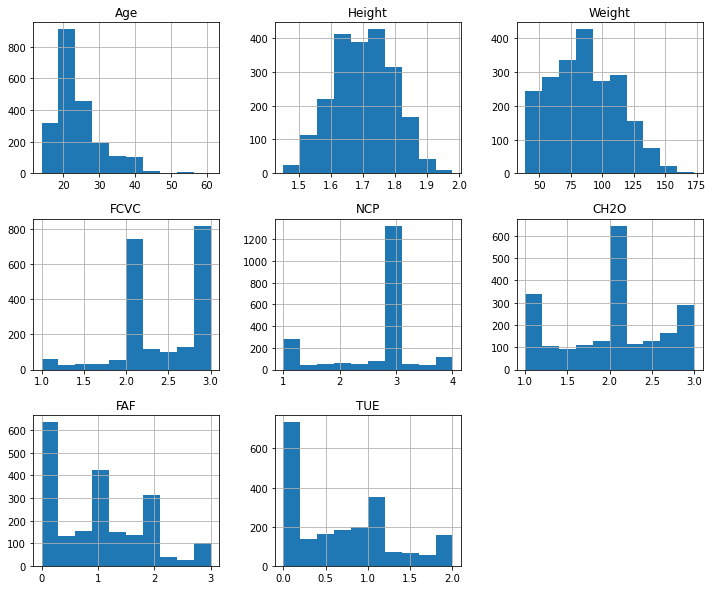

In [ ]:
df.hist(figsize=(12,10));#The purpose of a histogram is to illustrate how a given sample of data or population is distributed, 
                          #arranging the information in order to facilitate the visualization of the data distribution.

With this view it is easier to see that in fact only the first 3 are continuous variables. because we can observe the behavior of the graph and identify a pattern in the distribution. While in the others we can see the peaks at values 0, 1, 2, 3, 4.


# Let's understand the categorical variables and their categories.

In [ ]:
df[['Gender']].value_counts(sort = False)

Gender
Female    1043
Male      1068
dtype: int64

Respondents were asked about gender and the answers were: male or female.

In [ ]:
df[['family_history_overweight']].value_counts(sort = False)

family_history_overweight
no                            385
yes                          1726
dtype: int64

People were asked if family members suffered from overweight. Most of them replied affirmative.

In [ ]:
df[['FAVC']].value_counts(sort = False)

FAVC
no       245
yes     1866
dtype: int64

In [ ]:
1866/(1866+245)*100

88.39412600663192

Survey respondents had to say if they eat high caloric food frequenty. There were only two possible answers: "yes" or "no". Most of them (ca. 88%) admitted they consume high caloric food

In [ ]:
df[['CAEC']].value_counts(sort = False)

CAEC      
Always          53
Frequently     242
Sometimes     1765
no              51
dtype: int64

People had to say if and how offen they eat between meals. They could answer either "No" , or "Sometimes", "Frequently", or "Always". The data suggests that most people "sometimes" get small snacks between meals.

In [ ]:
df[['SMOKE']].value_counts(sort = False)

SMOKE
no       2067
yes        44
dtype: int64

The "WHO" says that smoking can influence weight gain, but in this data set, the most answered that they do not smoke, so we will not be able to identify any type of pattern in this statement.

In [ ]:
df[['SCC']].value_counts(sort = False)

SCC
no     2015
yes      96
dtype: int64

It seems people do not worry about the calories they get daily. Mosto of them answered "No" for calories monitoring

In [ ]:
df[['CALC']].value_counts(sort = False)

CALC      
Always           1
Frequently      70
Sometimes     1401
no             639
dtype: int64

Most people drink alcohol "sometimes", but many of them do not consume any alcoholic beverages.

In [ ]:
df[['MTRANS']].value_counts(sort = False)

MTRANS               
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
dtype: int64

people were asked about which means of transport they use most use public transport

In [ ]:
df[['NObeyesdad']].value_counts(sort = False)

NObeyesdad         
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64

This can be considered our response variable if we want to classify groups according to their fat percentage

# Feature engineer
Let's transform these 5 categorical variables that are numeric in the dataset

the numbers were of type float for some reason, but it would be difficult to create many categories, transforming them into integer first it is possible to truncate the values

In [ ]:
cols = ['FCVC', 'NCP','CH2O', 'FAF', 'TUE']
df[cols] = df[cols].applymap(np.int64)
df

,Gender,Age,Height,Weight,family_history_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III


According to https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub the following variables(
Frequency of consumption of vegetables (FCVC), 
Number of main meals (NCP), 
Consumption of water daily (CH20)
Physical activity frequency (FAF)
Time using technology devices (TUE))
are categoracal, because it's about frequency. They answer the questions below, so let's transform the numbers in their respective answer values.

Do you usually eat vegetables in your meals?(Never,Sometimes,Always)

How many main meals do you have daily?(Between 1 y 2,Three,More than three)

Do you eat any food between meals?(No,Sometimes,Frequently,Always)

How much water do you drink daily?(Less than a liter,Between 1 and 2 L,
More than 2 L)
How often do you have physical activity?(don't have,1 or 2 days,2 or 4 days,
4 or 5 days)

How much time do you use technological devices such as cell phone, videogames, television, computer and others?(0–2 hours,3–5,More than 5 hours)

## Checking possible values

In [ ]:
df[['FCVC']].value_counts(sort = False) #Return a Series containing counts of unique values. The resulting object will be in descending order by default so that the first element is the most frequently-occurring element. 

FCVC
1        202
2       1257
3        652
dtype: int64

In [ ]:
df[['NCP']].value_counts(sort = False)

NCP
1       395
2       285
3      1362
4        69
dtype: int64

In [ ]:
df[['CH2O']].value_counts(sort = False)

CH2O
1        769
2       1180
3        162
dtype: int64

In [ ]:
df[['FAF']].value_counts(sort = False)

FAF
0      1011
1       724
2       301
3        75
dtype: int64

In [ ]:
df[['TUE']].value_counts(sort = False)

TUE
0      1415
1       587
2       109
dtype: int64

## Replacing
replacing numerical values with their respective categories (answers)

In [ ]:
df['FCVC']=df['FCVC'].replace([1,2,3],['Never','Sometimes','Always'])
df['NCP']=df['NCP'].replace([1,2,3,4],['Between 1 y 2','Between 1 y 2','Three','More than three'])
df['CH2O']=df['CH2O'].replace([1,2,3],['Less than a liter','Between 1 and 2 L','More than 2 L'])
df['FAF']=df['FAF'].replace([0,1,2,3],['not have','1 or 2 days','2 or 4 days','4 or 5 days'])
df['TUE']=df['TUE'].replace([0,1,2],['0–2 hours','3–5 hours','More than 5 hours'])

In [ ]:
df

,Gender,Age,Height,Weight,family_history_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,not have,3–5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,not have,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Less than a liter,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.columns # getting columns names

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
cols_1 = ['Gender','family_history_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad']
df[cols_1] = df[cols_1].astype('category') #converting objects to categorical
df

,Gender,Age,Height,Weight,family_history_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,not have,3–5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,Sometimes,Between 1 y 2,Sometimes,no,Between 1 and 2 L,no,not have,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Always,Three,Sometimes,no,Less than a liter,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     2111 non-null   category
 1   Age                        2111 non-null   float64 
 2   Height                     2111 non-null   float64 
 3   Weight                     2111 non-null   float64 
 4   family_history_overweight  2111 non-null   category
 5   FAVC                       2111 non-null   category
 6   FCVC                       2111 non-null   category
 7   NCP                        2111 non-null   category
 8   CAEC                       2111 non-null   category
 9   SMOKE                      2111 non-null   category
 10  CH2O                       2111 non-null   category
 11  SCC                        2111 non-null   category
 12  FAF                        2111 non-null   category
 13  TUE                        2111 n

# Second EDA
Let's understand how the variables relate to each other

# Importing libries for data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Using scatterplot to understand relationship between two numerical variables

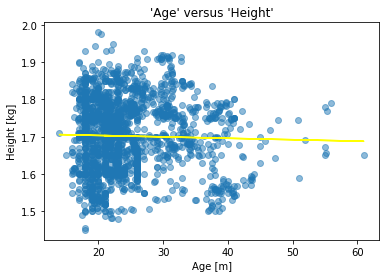

In [ ]:
plt.scatter(df["Age"], df["Height"], alpha = 0.5)
m, b = np.polyfit(df["Age"], df["Height"], 1)
plt.plot(df["Age"], m * df["Age"] + b, color = "yellow")
plt.xlabel("Age [m]")
plt.ylabel("Height [kg]")
plt.title("'Age' versus 'Height'")
plt.show()

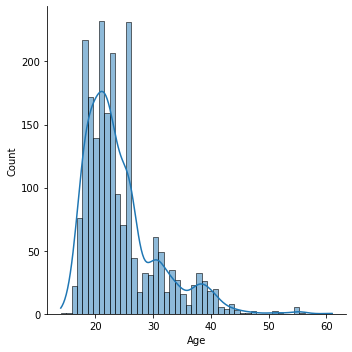

In [ ]:
sns.displot(df, x = 'Age', kde=True)#

We know that human beings can grow up to 21 years of age. In the graph we can see that most of the interviewees are between 20 and 26 years old and therefore the average height is constant, with a slight decrease, since older individuals can reduce their height.

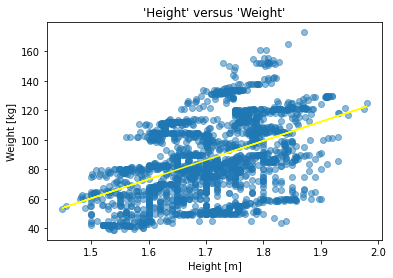

In [ ]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "yellow")
plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("'Height' versus 'Weight'")
plt.show()

The scatter plot above shows that height also influences weight. That's because taller individuals also have bigger skeletons, bigger organs, more water in the body, etc.

the graph of the count of individuals by age is asymmetrical, let's try to normalize it by applying log

In [ ]:
#df['Age_log'] = np.log(df['Age'] + 1)

In [ ]:
#sns.displot(df, x = 'Age_log', kde=True)

In [ ]:
#numeric vars
num_vars = df.select_dtypes(include=['float']).columns.tolist()

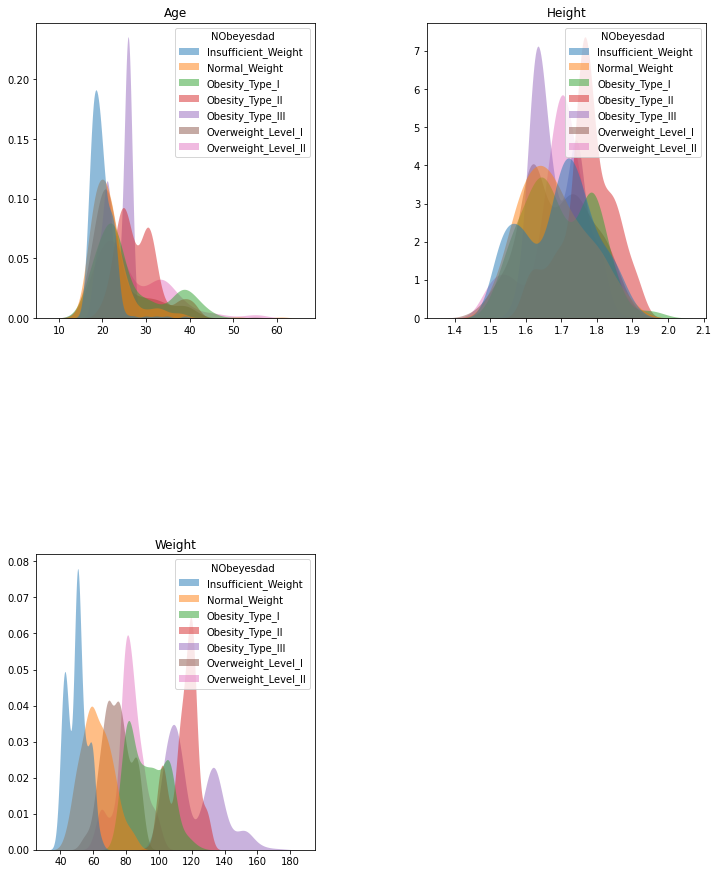

In [ ]:
fig = plt.figure(figsize=(12,25))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

total_plots = len(num_vars)
i = 0
# iterating over all numerical variables
for var in num_vars:
    
    ax = fig.add_subplot(total_plots, 2, i+1)
    
    sns.kdeplot(data=df, x=var, hue="NObeyesdad",
   fill=True, common_norm=False, palette="tab10",
   alpha=.5, linewidth=0)
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

**understanding density graphs.**
- **for the "age" variable**:
 we were able to perceive a certain pattern which shows that underweight is concentrated around 18-20 years of age. type 1 obesity around age 40; Type 2 obesity has a bimodal distribution with two peaks, the first at 25 years of age and the second at 30 years of age. and obeside type 3 has the highest peak at 27-28 years.
- **For the Height Variable**: Individuals with type 1 obesity are around 1.8 meters tall; type 2 obesity between 1.80 and 1.90 and type 3 obesity around 1.60

- **For the Weight Variable**:individuals with type 1 obesity weighed between 80 and 110 kg; type 2 obesity between 110 and 140 with a peak at 120 kg and type 3 obesity above 120 kg

**Hypotheses**:
We can assume that individuals with type 1 obesity are mostly 40 years old, 1.8 meters and 90 kg.
individuals with type 2 obesity, between 25 and 30 years between 1.8 and 1.9 meters.
individuals with type 3 obesity around 1.6 meters, between 27 and 28 years and over 120 kg.

understand the correlation of numerical variables with the target using the correlation matrix

In [ ]:
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=size)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-81-49656c7de448>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))


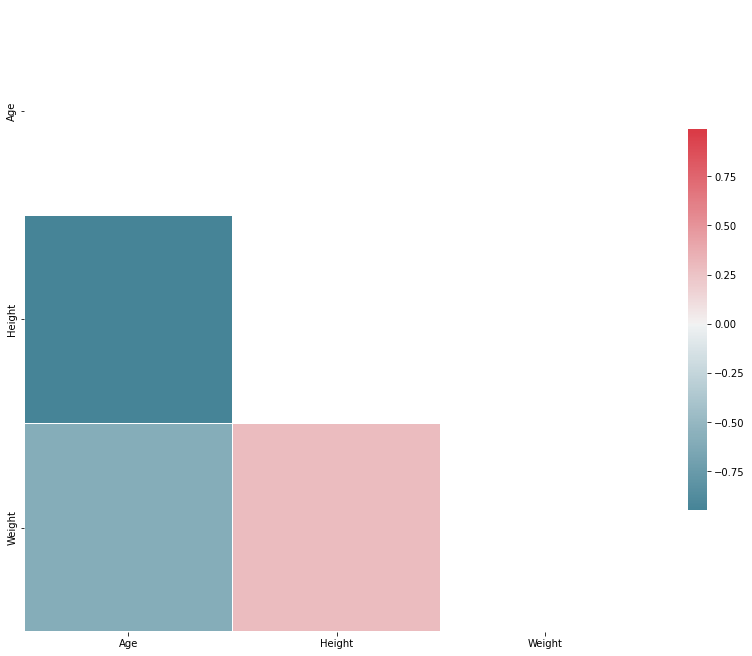

In [ ]:
corr_matrix = df[num_vars + ['NObeyesdad']].corr()
plot_corr_matrix(corr_matrix)

well, our target is a categorical variable and therefore the correlation matrix is not the most suitable. However, it can be seen that the variables height x weight are correlated.

In [ ]:
corr_matrix['Weight'].sort_values(ascending=False)

Weight    1.000000
Height    0.463136
Age       0.202560
Name: Weight, dtype: float64

In [ ]:
# categorical variables
cat_vars = df.select_dtypes(exclude=['float']).columns.tolist()
cat_vars.remove("NObeyesdad")
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

categorical vars(13): ['Gender', 'family_history_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


Let's take a look at the categorical variables and compare them to the weight variable.Because we want to evaluate the characteristics that influence weight. As weight is a continuous variable, the chosen graph will be a box plot.

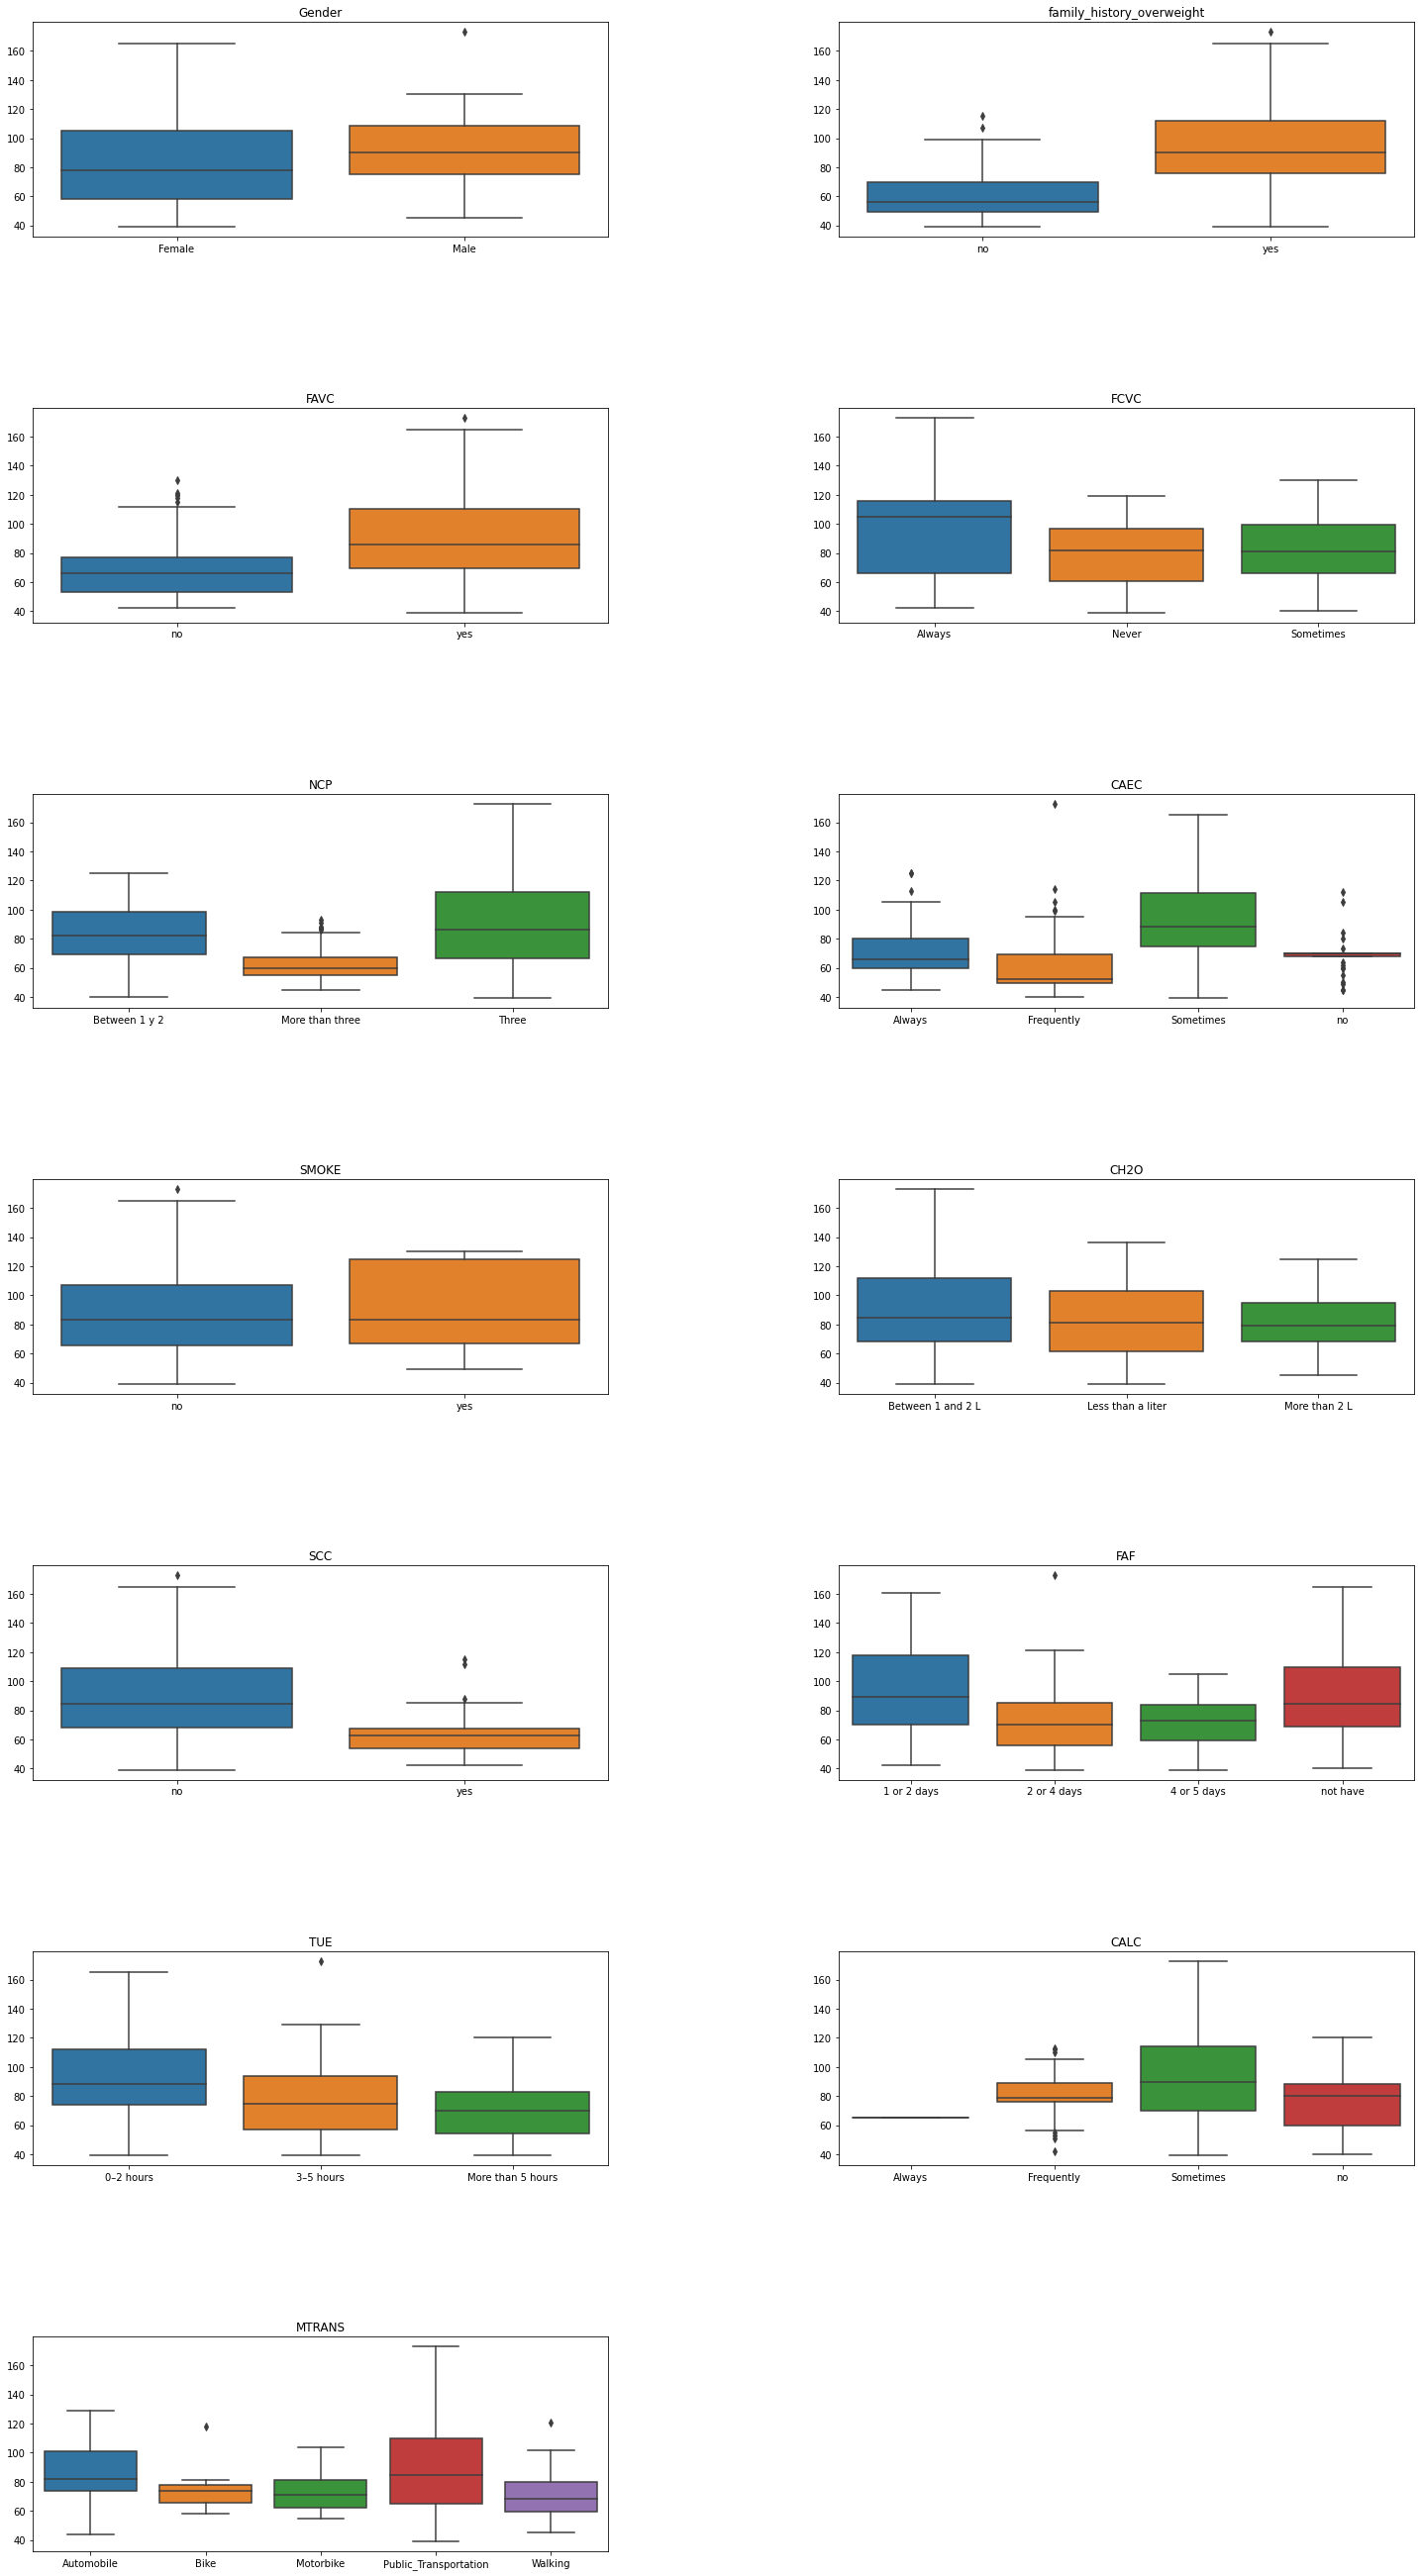

In [ ]:
fig = plt.figure(figsize=(25,90))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

total_plots = len(cat_vars)
i = 0
# Iterando para todas variaveis categoricas
for var in cat_vars:
    # Pegando o index certo para plotar o grafico
    ax = fig.add_subplot(total_plots, 2, i+1)
    # Desenhando o grafico do tipo violinplot
    sns.boxplot(x=var, y='Weight', data=df, ax=ax )
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

plt.show()

- Family history overweight: Those who have overweight history in their famlies are havier than those who don't have.
- Gender: Men are, generally, havier than women.
- Frequent consumption of high caloric food (FAVC):Those who eat a lot of caloric foods tend to have greater weight
- Frequency of consumption of vegetables (FCVC): Eating vegetables is not enough to control weight, as even those who say they always eat vegetables are usually overweight. It does not mean that vegetables are high in calories, but vegetables are even present in fast foods
- Number of main meals (NCP): those who eat 3 meals a day are heavier than those who eat more than 3. Hypothesis: People who eat more than 3 meals divide them into small portions and, in total, consume fewer calories per day.
- Consumption of food between meals (CAEC): 
- Consumption of water daily (CH20):those who drink more than 2 liters of water per day are thinner, according to the boxplot
- Consumption of alcohol (CALC):alcohol consumption does not seem to have much influence, as those who always drink appear to be underweight than those who never drink 
- Calories consumption monitoring (SCC):Those who control their daily calorie intake appear to be lighter than those who do not.
- Physical activity frequency (FAF):those who do not practice physical activity or only practice up to a maximum of twice a week tend to be heavier
- Time using technology devices (TUE):People who spend more time using technology tend to be lighter. We know that most of the time people who use smartphones or notebooks spend a lot of time on social networks where they are often bombarded by publications that encourage beauty standards. one hypothesis is that overweight people do not feel comfortable spending so much time on social networks.
- Transportation used (MTRANS): people who answered that they use a bicycle, motorcycle or no means of transport tend to have lower weight

In [ ]:
print('Categorical mean cardinalities:', np.mean(df[cat_vars].nunique()))
df[cat_vars].nunique().sort_values(ascending=False)

Categorical mean cardinalities: 3.0


MTRANS                       5
CAEC                         4
FAF                          4
CALC                         4
FCVC                         3
NCP                          3
CH2O                         3
TUE                          3
Gender                       2
family_history_overweight    2
FAVC                         2
SMOKE                        2
SCC                          2
dtype: int64

the cardinality of a set is a measure of the "number of elements in the set". For example, the set A={2,4,6} contains 3 elements and therefore has cardinality 3. Variables with very high cardinality hinder the analysis. let's prefer categories that have a maximum of 10 elements (categories).

In [ ]:
def count_values(dataset, cat, order = None):#function to build a bar chart with count of grouped values

    ax = sns.countplot(x = cat, data = dataset, palette ="dark:salmon_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat} category")
    plt.show()

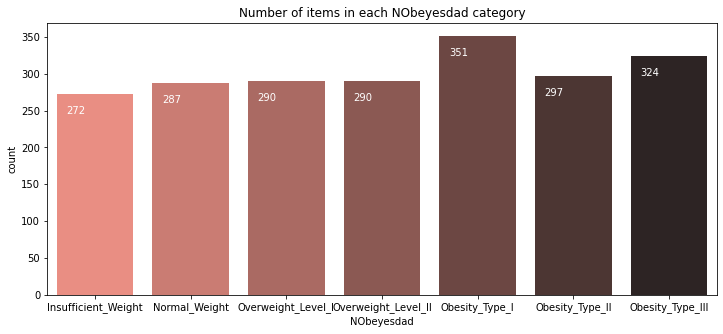

In [ ]:
plt.figure(figsize = (12, 5))
count_values(df, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [ ]:
def cross_plot(dataset, lead_category, sup_category, order = None):##function to divide each unique value of the variable Nobeyesdad by the unique values of the variable of interest

    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "dark:salmon_r")
    
    plt.show()

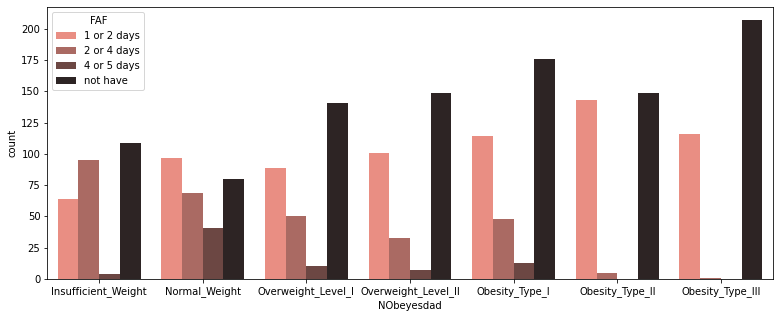

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "FAF", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

individuals who practice physical activity more than twice a week tend to have normal weight

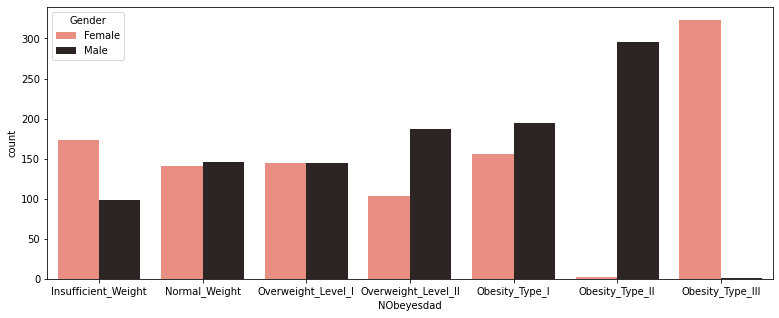

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

women suffer more from underweight, one hypothesis is that they are more susceptible to fashion standards. For normal weight and slightly overweight the data are balanced as men seem to suffer more from obesity, less in the last category of extreme obesity.

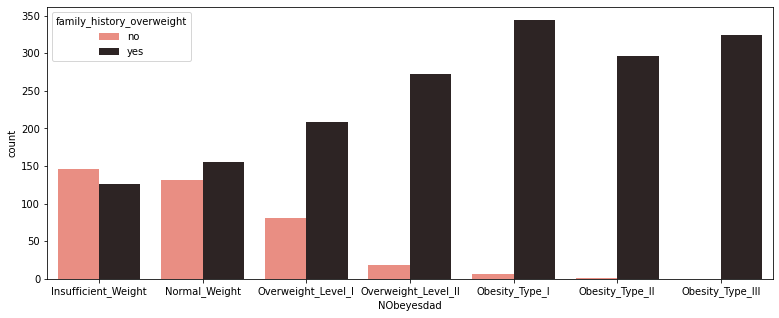

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "family_history_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

it seems that family history is an important feature. Those who have a positive family history of overweight family members seem to have greater weight. The hypotheses would be: Does this happen because habits are copied or is it a genetic factor?

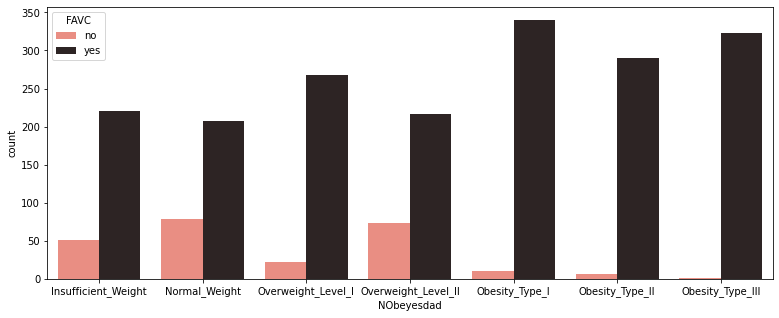

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

all groups had a large amount of people consuming high-calorie foods. We can infer that the problem is in the amount (total calories ingested in the day) and not just in yes or no.

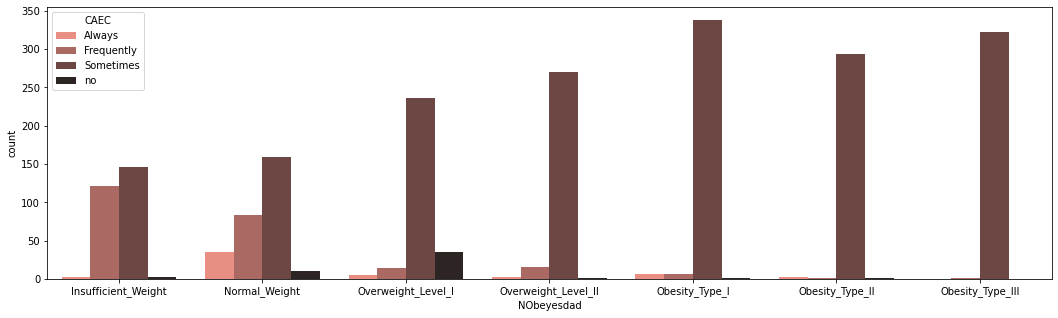

In [ ]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

all groups have many people who "sometimes" eat snacks before meals.
the "INsufficient_Weight" and "Normal_weight" groups also presented the "always" and "frequently" answers.
One hypothesis is that these snacks may reduce appetite and cause them to have smaller meals.

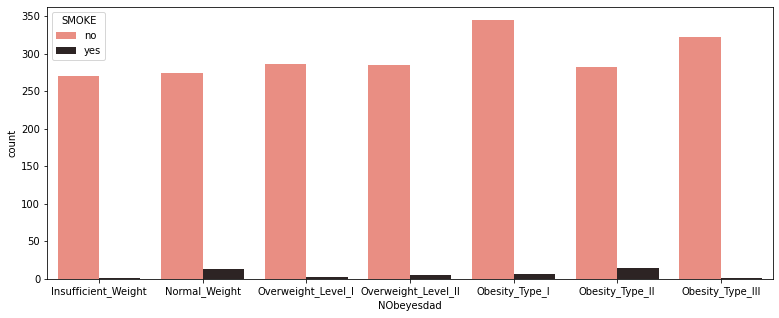

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

for smokers the dataset is very unbalanced almost all answered that they do not smoke

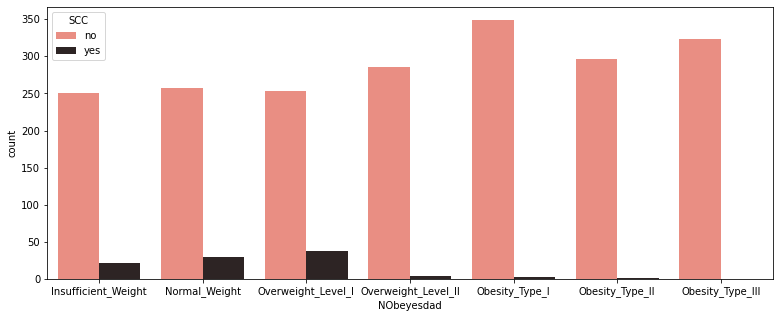

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

few responded that they monitor their calorie intake so not much can be conclude. all groups many people answered that they do not control

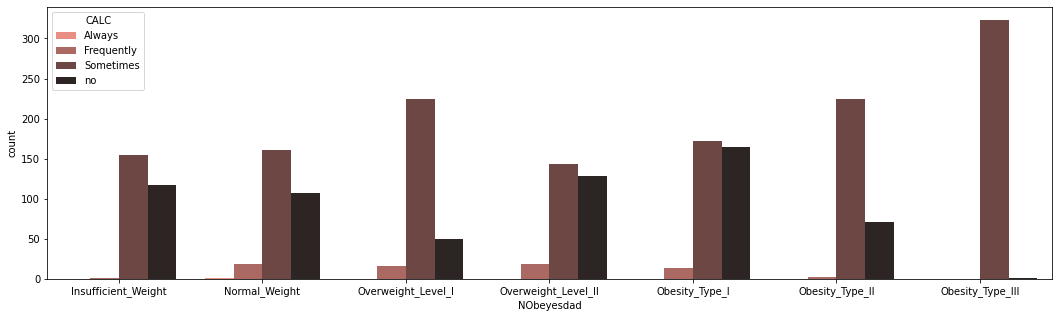

In [ ]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

alcohol intake has a weak correlation with weight gain.

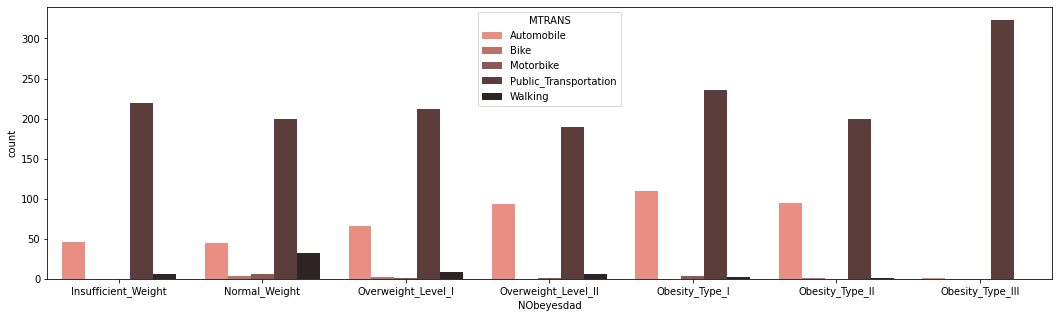

In [ ]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Transportation looks like does not affect a person's weight. slim, normal and overweight people use public transport; all groups rarely use cars.

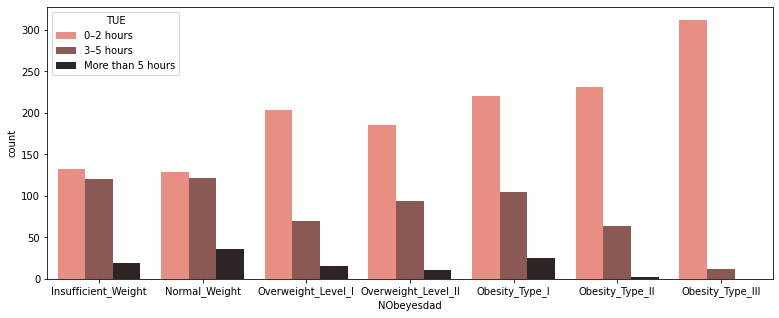

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "TUE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

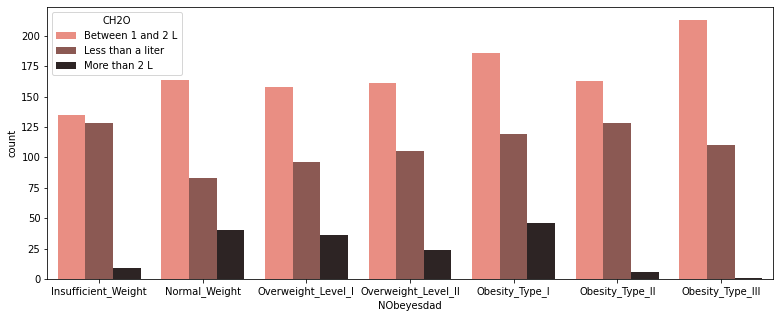

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "CH2O", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

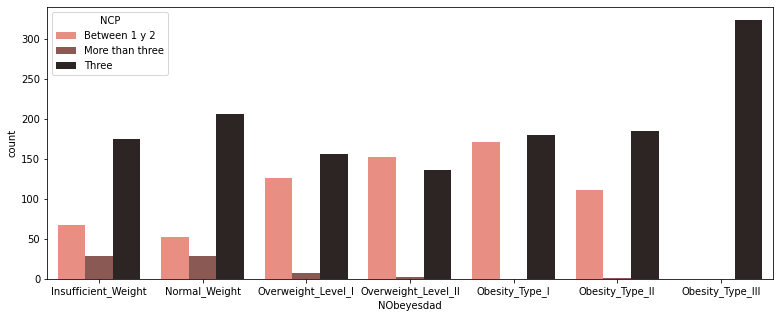

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "NCP", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

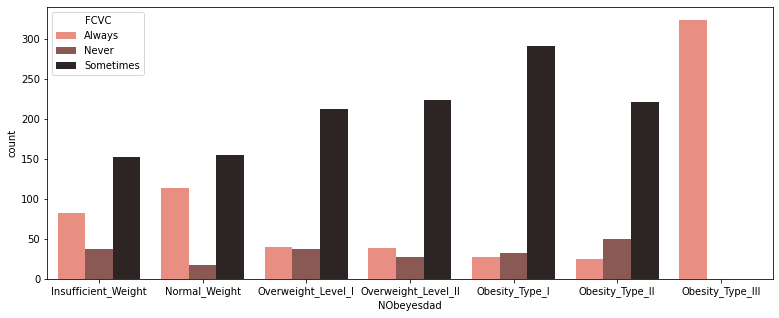

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "FCVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

## Handling missing values and Outliers
null or missing values can disrupt the model. let's check if there is any

In [ ]:
df.isnull().mean().round(4)*100 

Gender                       0.0
Age                          0.0
Height                       0.0
Weight                       0.0
family_history_overweight    0.0
FAVC                         0.0
FCVC                         0.0
NCP                          0.0
CAEC                         0.0
SMOKE                        0.0
CH2O                         0.0
SCC                          0.0
FAF                          0.0
TUE                          0.0
CALC                         0.0
MTRANS                       0.0
NObeyesdad                   0.0
dtype: float64

no missing values

Outliers can influence the results. Imagine, for example, that we want to know the average wealth of people in a bar on the corner of any neighborhood, but that day Bill Gates is having a cup of coffee. Do you agree that there will be discrepancy in this average? This is the reason for eliminating outliers. Although they don't get in the way as much in ranking something, as ranking models are able to notice these outliers.But it is important to get used to this treatment as it is useful for regression models

In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(df['Height'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Height'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Height'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Height'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (2111, 17)
New Shape:  (2110, 17)


In [ ]:

# IQR
Q1 = np.percentile(df['Weight'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Weight'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Weight'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Weight'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (2110, 17)
New Shape:  (2109, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     2109 non-null   category
 1   Age                        2109 non-null   float64 
 2   Height                     2109 non-null   float64 
 3   Weight                     2109 non-null   float64 
 4   family_history_overweight  2109 non-null   category
 5   FAVC                       2109 non-null   category
 6   FCVC                       2109 non-null   category
 7   NCP                        2109 non-null   category
 8   CAEC                       2109 non-null   category
 9   SMOKE                      2109 non-null   category
 10  CH2O                       2109 non-null   category
 11  SCC                        2109 non-null   category
 12  FAF                        2109 non-null   category
 13  TUE                        2109 n

#**MODELING**

# Pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


## Data Prep

In [ ]:
obesity_dummies = pd.get_dummies(df[["Gender", "family_history_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS",'FCVC','CH2O','TUE','NCP','FAF',]])

In [ ]:
label = df[["NObeyesdad"]]

In [ ]:
numeric_features = df[["Age", "Height", "Weight"]]

In [ ]:
features = pd.concat([numeric_features, obesity_dummies], axis = 1)

In [ ]:
features

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_overweight_no,family_history_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,...,TUE_0–2 hours,TUE_3–5 hours,TUE_More than 5 hours,NCP_Between 1 y 2,NCP_More than three,NCP_Three,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_not have
0,21.000000,1.620000,64.000000,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21.000000,1.520000,56.000000,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,23.000000,1.800000,77.000000,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,27.000000,1.800000,87.000000,0,1,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,22.000000,1.780000,89.800000,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2107,21.982942,1.748584,133.742943,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2108,22.524036,1.752206,133.689352,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2109,24.361936,1.739450,133.346641,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
label

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
# Tranform str to int
encoder = LabelEncoder()
encoder.fit(label)
list(encoder.classes_)
label_encoded = encoder.transform(label)
label_encoded

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [ ]:
label_encoded.head(100)

AttributeError: ignored

## Train Teste Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, label_encoded, test_size=0.3, random_state=0
)

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('imputer', SimpleImputer(strategy='median')),
                 ('clf', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9320695102685624

## Testing many models

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
classifiers_list = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

In [ ]:
for classifier in classifiers_list:
    pipe = Pipeline(steps=[("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.882
SVC(C=0.025, probability=True)
model score: 0.308
SVC()
model score: 0.600


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
model score: 0.695
DecisionTreeClassifier()
model score: 0.932
RandomForestClassifier()
model score: 0.916
AdaBoostClassifier()
model score: 0.417
GradientBoostingClassifier()
model score: 0.940


GradientBoosting seems to be the best model for this case

In [ ]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
preditos_grb = grb.predict(X_test)
print(classification_report(y_test, preditos_grb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        92
           1       0.88      0.92      0.90        85
           2       0.96      0.93      0.94       110
           3       0.93      0.99      0.96        90
           4       1.00      0.98      0.99        92
           5       0.91      0.85      0.88        82
           6       0.92      0.96      0.94        82

    accuracy                           0.94       633
   macro avg       0.94      0.94      0.94       633
weighted avg       0.94      0.94      0.94       633



classification_report: most of the samples in "Obesity_Type_III" (class 4) were properly classified. The model reached 100% "precision" and 99% "f1 score". On the other hand, features indicating "Over_Weight" (class 5)  had the lowest accuracy but still high(88%)

# Tunning Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Os hiperparâmetros "fixos", você chama no momento que instancia o objeto do modelo
grb_g = GradientBoostingClassifier(random_state=61658)

# Os que você deseja testar, coloque em um dicionário:
params = {
    'learning_rate' : [0.1,0.5,1],
    'n_estimators' : [150,200,500],
    'subsample' : [0.1,1],
    'criterion' : ['friedman_mse','squared_error'],
    'min_samples_split' : [2,4,8],
    'min_samples_leaf' : [1,2,4],
    'min_samples_leaf' : [1,2,4,8],
    'max_depth' : [3],
}

grid = GridSearchCV(
    grb_g,
    params,
    cv=10,
    scoring='accuracy', 
    verbose=10,
    n_jobs=1,
)

grid.fit(X_test, y_test)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV 1/10; 1/432] START criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1
[CV 1/10; 1/432] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1;, score=0.109 total time=   1.1s
[CV 2/10; 1/432] START criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1
[CV 2/10; 1/432] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1;, score=0.812 total time=   1.2s
[CV 3/10; 1/432] START criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1
[CV 3/10; 1/432] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_spli

KeyboardInterrupt: ignored

In [ ]:
grb_tuned = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=1)
grb_tuned.fit(X_train, y_train)
preditos_grb_T = grb_tuned.predict(X_test)
print(classification_report(y_test, preditos_grb_T))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        92
           1       0.87      0.93      0.90        85
           2       0.99      0.93      0.96       110
           3       0.91      0.99      0.95        90
           4       1.00      0.98      0.99        92
           5       0.93      0.85      0.89        82
           6       0.93      0.99      0.96        82

    accuracy                           0.94       633
   macro avg       0.94      0.94      0.94       633
weighted avg       0.95      0.94      0.94       633



# Check the most important features

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.0 MB/s 
     |████████████████████████████████| 133 kB 45.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=80f1e207dfa3694b66269351568c72497d61f239548a5324d8076809b6b4e455
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
features.columns

Index(['Age', 'Height', 'Weight', 'Gender_Female', 'Gender_Male',
       'family_history_overweight_no', 'family_history_overweight_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no',
       'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'FCVC_Always',
       'FCVC_Never', 'FCVC_Sometimes', 'CH2O_Between 1 and 2 L',
       'CH2O_Less than a liter', 'CH2O_More than 2 L', 'TUE_0–2 hours',
       'TUE_3–5 hours', 'TUE_More than 5 hours', 'NCP_Between 1 y 2',
       'NCP_More than three', 'NCP_Three', 'FAF_1 or 2 days',
       'FAF_2 or 4 days', 'FAF_4 or 5 days', 'FAF_not have'],
      dtype='object')

In [ ]:
# getting the features names
f = ['Age_log', 'Height', 'Weight', 'Gender_Female', 'Gender_Male',
       'family_history_overweight_no', 'family_history_overweight_yes',
       'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no',
       'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'FCVC_Always',
       'FCVC_Never', 'FCVC_Sometimes', 'CH2O_Between 1 and 2 L',
       'CH2O_Less than a liter', 'CH2O_More than 2 L', 'TUE_0–2 hours',
       'TUE_3–5 hours', 'TUE_More than 5 hours', 'NCP_Between 1 y 2',
       'NCP_More than three', 'NCP_Three', 'FAF_1 or 2 days',
       'FAF_2 or 4 days', 'FAF_4 or 5 days', 'FAF_not have']

In [ ]:
perm = PermutationImportance(grb_tuned, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = f)

Weight,Feature
0.7292 ± 0.0186,Weight
0.2976 ± 0.0281,Height
0.0626 ± 0.0101,Gender_Female
0.0493 ± 0.0092,Age_log
0.0088 ± 0.0055,Gender_Male
0.0041 ± 0.0051,CH2O_Less than a liter
0.0041 ± 0.0015,FAVC_no
0.0025 ± 0.0043,FCVC_Never
0.0019 ± 0.0024,MTRANS_Automobile
0.0016 ± 0.0000,family_history_overweight_no


The features "Weight" and "Height" are the most importants features of the model. With that information we can get clustering information.

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [ ]:
def plot_c(dataset, feature_x, feature_y, labels, title = None):
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.scatterplot(data = dataset, x = feature_x, y = feature_y, hue = labels, palette = "tab10",ax = ax)
    if title is not None:
        plt.title(title)
    plt.show()

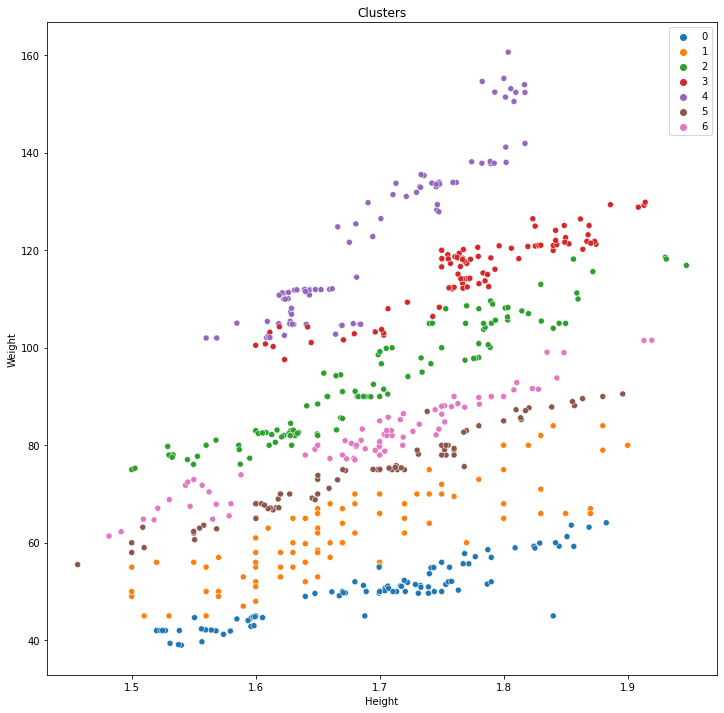

In [ ]:
plot_c(X_test, "Height", "Weight", y_test, "Clusters")

- 0: "Insufficient_Weight"->individuals in group 0 have a low slope of the weight x height line. even tall individuals are underweight; 
- 1: "Normal_Weight" - > individuals in group 1 have an ideal slope of the weight x height line. Where individuals are according to their Body mass index (BMI) weight/(height*height)= 18.5 - 24.9 
- 2: 'Obesity_Type_I' -> has the third highest slope of the groups behind groups 3 and 4, which in fact are grade 2 and 3 obesity 
- 3: 'Obesity_Type_II' - > individuals between 100 and 125 kg and a height of 1.60m to 1.90 m
- 4: 'Obesity_Type_III'- > individuals between 100 and 160 kg and a height of 1.55m to 1.80 m
- 5: 'Overweight_Level_I'- > individuals between 60 and 85 kg and a height of 1.55m to 1.90 m
- 6: 'Overweight_Level_II - >individuals between 60 and 90 kg and a height of 1.50m to 1.90 m
